<a href="https://colab.research.google.com/github/Mounikabodepu/PD-model-Credit-Risk-/blob/main/ML_GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION ANALYSIS IN STOCK PRICE PREDICTION


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import yfinance as yf

In [2]:
stock_data = yf.download("RELIANCE.NS", start="2010-01-01", end="2023-01-01")
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2010-01-04,207.491165,245.841202,249.407104,233.577728,249.407104,76646086
2010-01-05,206.565125,244.744003,262.847809,243.532516,262.847809,21392825
2010-01-06,209.902771,248.698502,250.184296,244.732574,246.846970,23691760
2010-01-07,213.385025,252.824417,254.870239,246.412659,248.698502,26197920
2010-01-08,212.825531,252.161530,254.595947,250.527161,253.270157,15110149


In [3]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
stock_data['10_Day_MA'] = stock_data['Close'].rolling(10).mean()
stock_data['20_Day_MA'] = stock_data['Close'].rolling(20).mean()
stock_data['Price_Movement'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

In [4]:
stock_data.fillna(method='bfill', inplace=True)
stock_data.head(10)


<ipython-input-4-e71c002d3bb2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='bfill', inplace=True)


Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,10_Day_MA,20_Day_MA,Price_Movement
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,
Date,,,,,,,,,,
2010-01-04,207.491165,245.841202,249.407104,233.577728,249.407104,76646086,-0.004463,249.84827,245.710344,0
2010-01-05,206.565125,244.744003,262.847809,243.532516,262.847809,21392825,-0.004463,249.84827,245.710344,1
2010-01-06,209.902771,248.698502,250.184296,244.732574,246.846970,23691760,0.016158,249.84827,245.710344,1
2010-01-07,213.385025,252.824417,254.870239,246.412659,248.698502,26197920,0.016590,249.84827,245.710344,0
2010-01-08,212.825531,252.161530,254.595947,250.527161,253.270157,15110149,-0.002622,249.84827,245.710344,0
2010-01-11,208.648682,247.212708,262.802094,240.012344,259.373322,188649642,-0.019626,249.84827,245.710344,1
2010-01-12,209.198578,247.864166,259.967651,246.184082,250.298584,32790509,0.002635,249.84827,245.710344,1
2010-01-13,210.018509,248.835648,249.612823,244.263977,248.698502,15360176,0.003919,249.84827,245.710344,1


In [5]:
regression_features = ['Close', '10_Day_MA', '20_Day_MA']
X_regression = stock_data[regression_features].dropna()
y_regression = stock_data['Close'].shift(-1).dropna()

In [6]:

X_regression = stock_data.drop(columns=['Close']).iloc[:-1]
y_regression = stock_data['Close'].shift(-1).dropna()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [7]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
rmse,mae,r2

(7.614067912578394, 5.171044266664357, 0.9994779257624917)

In [10]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


MAE: 5.171044266664357
MSE: 57.97403017735589


LOGISTIC REGRESSION FOR PREDICTING THE PRICE MOVEMENT

In [11]:
X = stock_data[['Close', 'Adj Close', 'Volume', '10_Day_MA', '20_Day_MA']]
y = stock_data['Price_Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.48130841121495327
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.48      1.00      0.65       309

    accuracy                           0.48       642
   macro avg       0.24      0.50      0.32       642
weighted avg       0.23      0.48      0.31       642



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.46417445482866043
              precision    recall  f1-score   support

           0       0.48      0.41      0.45       333
           1       0.45      0.52      0.48       309

    accuracy                           0.46       642
   macro avg       0.47      0.47      0.46       642
weighted avg       0.47      0.46      0.46       642



TIME-SERIES ANALYSIS (ARIMA)


In [50]:

from statsmodels.tsa.arima.model import ARIMA

[*********************100%***********************]  1 of 1 completed


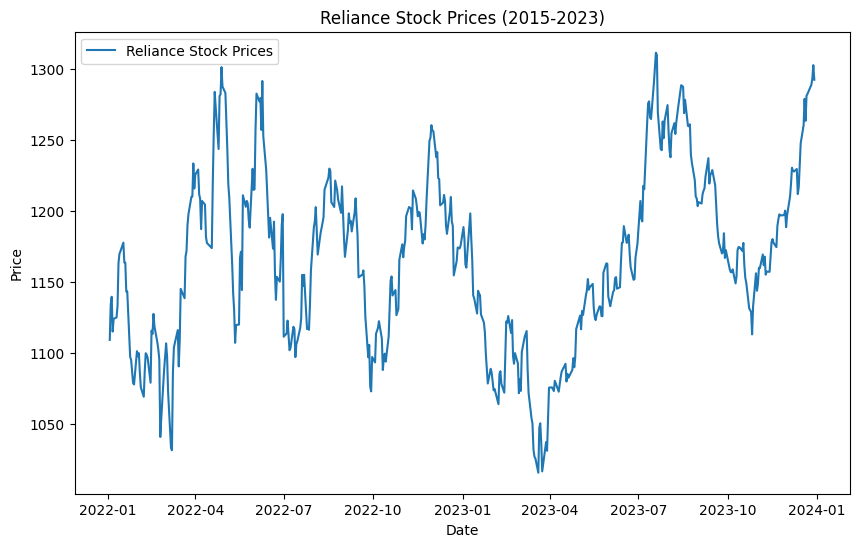

ADF Statistic: -2.8491211425455645
p-value: 0.05159249115230793
The series is not stationary.
ADF Statistic: -20.8161803626382
p-value: 0.0
The series is stationary.


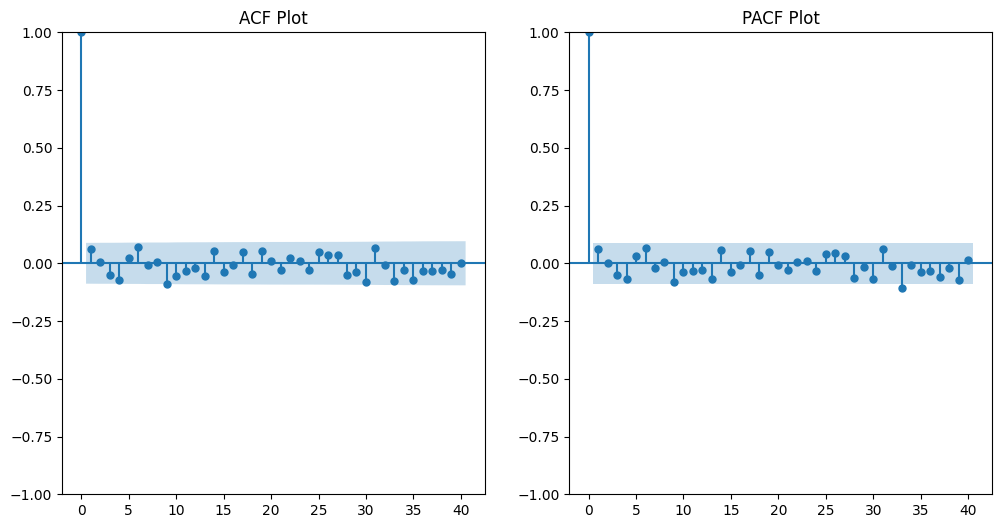

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:            RELIANCE.NS   No. Observations:                  394
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1680.391
Date:                Fri, 13 Dec 2024   AIC                           3370.782
Time:                        20:25:23   BIC                           3390.651
Sample:                             0   HQIC                          3378.656
                                - 394                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1226      0.056      2.178      0.029       0.012       0.233
ar.L2         -0.9012      0.053    -16.882      0.000      -1.006      -0.797
ma.L1         -0.0914      0.044     -2.091      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


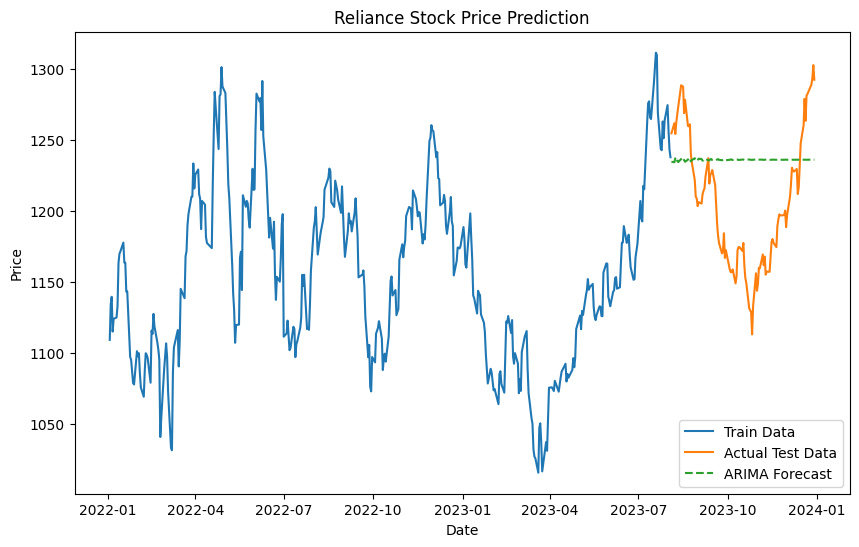

Root Mean Squared Error (RMSE): 54.53075433834851


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf


stock_symbol = "RELIANCE.NS"
start_date = "2022-01-01"
end_date = "2023-12-31"


data = yf.download(stock_symbol, start=start_date, end=end_date)
prices = data['Close'].dropna()

plt.figure(figsize=(10, 6))
plt.plot(prices, label="Reliance Stock Prices")
plt.title("Reliance Stock Prices (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

check_stationarity(prices)


prices_diff = prices.diff().dropna()
check_stationarity(prices_diff)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(prices_diff, ax=plt.gca(), lags=40)
plt.title("ACF Plot")
plt.subplot(1, 2, 2)
plot_pacf(prices_diff, ax=plt.gca(), lags=40)
plt.title("PACF Plot")
plt.show()


p = 2
d = 1
q = 2


train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]


model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())


forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index


plt.figure(figsize=(10, 6))
plt.plot(train, label="Train Data")
plt.plot(test, label="Actual Test Data")
plt.plot(forecast_index, forecast, label="ARIMA Forecast",linestyle="--")
plt.title("Reliance Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)